# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [1]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [4]:
X=torch.arange(12).view(4, 3) #0 to 11
Y=torch.rand(4, 3) #Creates a tensor with random values uniformly sampled between 0 and 1
print(X)
print(Y)

# 행으로 병합 코드
#cat - 지정된 차원에서 텐서들을 이어붙여, 차원 수는 유지되고 해당 차원이 늘어남.
print(torch.cat((X, Y), dim=0))

# 열로 병합 코드
print(torch.cat((X, Y), dim=1))


tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[0.0282, 0.3535, 0.1742],
        [0.3837, 0.4657, 0.4417],
        [0.3703, 0.8457, 0.3144],
        [0.4249, 0.1226, 0.1340]])
tensor([[ 0.0000,  1.0000,  2.0000],
        [ 3.0000,  4.0000,  5.0000],
        [ 6.0000,  7.0000,  8.0000],
        [ 9.0000, 10.0000, 11.0000],
        [ 0.0282,  0.3535,  0.1742],
        [ 0.3837,  0.4657,  0.4417],
        [ 0.3703,  0.8457,  0.3144],
        [ 0.4249,  0.1226,  0.1340]])
tensor([[ 0.0000,  1.0000,  2.0000,  0.0282,  0.3535,  0.1742],
        [ 3.0000,  4.0000,  5.0000,  0.3837,  0.4657,  0.4417],
        [ 6.0000,  7.0000,  8.0000,  0.3703,  0.8457,  0.3144],
        [ 9.0000, 10.0000, 11.0000,  0.4249,  0.1226,  0.1340]])


In [6]:
#stack - 새로운 차원을 추가하여 텐서 쌓음. 두 텐서를 새로운 차원으로 묶음
print(torch.stack([X,Y], dim=0))
print(torch.stack([X,Y], dim=1))

tensor([[[ 0.0000,  1.0000,  2.0000],
         [ 3.0000,  4.0000,  5.0000],
         [ 6.0000,  7.0000,  8.0000],
         [ 9.0000, 10.0000, 11.0000]],

        [[ 0.0282,  0.3535,  0.1742],
         [ 0.3837,  0.4657,  0.4417],
         [ 0.3703,  0.8457,  0.3144],
         [ 0.4249,  0.1226,  0.1340]]])
tensor([[[ 0.0000,  1.0000,  2.0000],
         [ 0.0282,  0.3535,  0.1742]],

        [[ 3.0000,  4.0000,  5.0000],
         [ 0.3837,  0.4657,  0.4417]],

        [[ 6.0000,  7.0000,  8.0000],
         [ 0.3703,  0.8457,  0.3144]],

        [[ 9.0000, 10.0000, 11.0000],
         [ 0.4249,  0.1226,  0.1340]]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [7]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

In [40]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [41]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) #평균 0,sd 1인 정규분포 따르는  ( ) 크기의 텐서 생성
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) #평균 0, sd 0.01인 노이즈를 y에 추가
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000) #features:input, labels:target

In [42]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.4714,  1.2579]) 
label: tensor([-0.7906])


In [43]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0,num_examples,batch_size): #배치 크기만큼 반복
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) #현재 배치에 해당하는 인덱스 가져오기
        yield features[batch_indices], labels[batch_indices]

In [44]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5898,  0.2071],
        [-0.8455,  0.0370],
        [ 0.5245, -0.1814],
        [ 0.0320, -1.3877],
        [-1.0895, -0.7662],
        [-0.5412, -0.4935],
        [-0.5474, -0.9576],
        [ 0.8019, -0.6509],
        [-0.9618,  1.1840],
        [ 0.1249, -0.7307],
        [ 0.7373, -1.7048],
        [ 0.6462, -0.8258],
        [ 1.7388,  0.2702],
        [ 0.0204,  0.1646],
        [ 0.2117,  0.9756],
        [ 1.6346, -0.6010],
        [-2.1266, -0.8044],
        [ 0.0332, -1.0321],
        [-0.7063,  0.2298],
        [-0.6682, -0.8855]]) 
 tensor([[ 6.9605],
        [ 2.9010],
        [ 7.3452],
        [ 7.6998],
        [ 3.3917],
        [ 4.6167],
        [ 5.2960],
        [ 8.8770],
        [ 0.8390],
        [ 6.9727],
        [10.2871],
        [ 8.6707],
        [10.3103],
        [ 5.3292],
        [ 4.6762],
        [11.3122],
        [ 0.3241],
        [ 7.1507],
        [ 3.0376],
        [ 4.8221]])


In [45]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([0])

In [46]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [47]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [50]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
          if param.grad is not None: #param.grad가 None이 아닌 경우에만 매개변수를 업데이트
            param -= lr*param.grad/batch_size #매개변수 업데이트: 기울기 반대 방향으로 이동함으로써 손실 함수 최소화하는 방향으로 조정
                                          #학습률*현재 매개변수 기울기/미니배치크기 => 각 샘플의 평균 기울기
            param.grad.zero_() #매개변수 기울기 0으로 초기화 #안 하면 이전 반복 기울기 누적됨

In [55]:
lr =0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  #예측값과 실제값의 loss 계산
        l.sum().backward()   # Compute gradient on `l` with respect to [`w`, `b`]
        sgd([w, b], lr, batch_size) #매개변수 업데이트
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels) #전체 데이터에 대한 loss 계산
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}') #에포크별 손실 print

epoch 1, loss 15.122166
epoch 2, loss 15.122314
epoch 3, loss 15.121774
epoch 4, loss 15.124065
epoch 5, loss 15.136127
epoch 6, loss 15.126086
epoch 7, loss 15.131066
epoch 8, loss 15.142634
epoch 9, loss 15.126223
epoch 10, loss 15.141390


In [56]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.1016, -0.1717], grad_fn=<SubBackward0>)
error in estimating b: tensor([5.5000])


\+ cost graph 그리기 (x축 w, y축 loss)

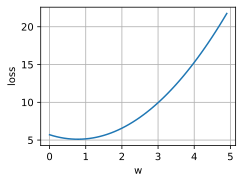

In [63]:
w_range=torch.arange(0,5,0.1)
losses = []
for w_i in w_range:
  w_test = torch.tensor([[w_i],[w_i]],requires_grad=True)
  l=loss(net(features, w_test, true_b), labels)
  losses.append(l.mean().item())

d2l.plot(w_range.detach().numpy(), losses, 'w', 'loss')


### Concise Implementation of Linear Regression
- API 사용해보기

In [66]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [67]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [68]:
next(iter(data_iter))

[tensor([[ 0.4746, -0.4390],
         [-0.3198,  0.7522],
         [-0.7420,  0.1137],
         [ 0.7806,  0.8032],
         [ 1.3858, -0.6875],
         [ 0.8681, -1.2143],
         [ 1.2444,  0.1514],
         [-0.3681, -0.3154],
         [-0.4286, -1.1623],
         [-0.4426,  0.9987],
         [ 0.9678,  1.2164],
         [ 0.7395, -0.6059],
         [ 0.5254,  2.0578],
         [ 0.4684, -0.7870],
         [-0.6923, -0.8069],
         [-1.5547,  1.4323],
         [-0.5058, -0.6198],
         [ 0.5939,  0.1949],
         [ 1.0654,  0.5544],
         [ 0.2291, -0.1804]]),
 tensor([[ 7.5761],
         [ 3.4234],
         [ 3.1134],
         [ 6.6277],
         [10.6803],
         [ 9.9302],
         [ 8.9873],
         [ 4.8720],
         [ 5.9734],
         [ 2.6920],
         [ 6.5630],
         [ 8.6261],
         [ 3.9728],
         [ 8.0878],
         [ 4.6215],
         [-1.3238],
         [ 4.9179],
         [ 6.9810],
         [ 7.8519],
         [ 6.4425]])]

In [69]:
from torch import nn

net=nn.Sequential(nn.Linear(2,1)) #input 2차원, output 1차원

In [70]:
net[0].weight.data.normal_(0, 0.01) #가중치를 평균 0, sd 0.01인 정규분포 따르도록 초기화
net[0].bias.data.fill_(0) #편향 0으로 초기화

tensor([0.])

In [73]:
loss = nn.MSELoss()

In [78]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03) #net.parameters() : optimizer는 모델의 매개변수를 업데이트하는데, 이때 parameters() 사용해서 모델의 모든 매개변수 가져옴

In [76]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y) #예측값, 실제값 loss 계산
        trainer.zero_grad() #기울기 초기화
        l.backward() #역전파로 매개변수에 대한 기울기 계산
        trainer.step() #계산된 기울기로 매개변수 업데이트
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000098
epoch 2, loss 0.000098
epoch 3, loss 0.000098


In [77]:
w = net[0].weight.data #net의 linear(2,1)의 학습된 가중치 가져오고 텐서 데이터 반환
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data #학습된 bias 반환
print('error in estimating b:', true_b - b)

error in estimating w: tensor([8.2731e-05, 1.9372e-04])
error in estimating b: tensor([0.0005])
